# Importing Dependencies 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


## Data collection and processing 

##### load dataset

In [2]:
car_dataset = pd.read_csv(r"C:\Users\Hp\Desktop\data analytic\car data.csv")
car_dataset.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


### checking the no.of row and column 

In [3]:
car_dataset.shape

(301, 9)

### getting some info of dataset 

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### checking missing value 

In [5]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### checking the distribution of categorical data 

In [6]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Owner.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


## encodeing the categorical data 

In [7]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17320\3875546958.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [8]:
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17320\839709845.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [9]:
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17320\619912639.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [10]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### spliting the data into traning data & testing data 

In [11]:
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [12]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [13]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### spliting traning and test data 

In [14]:
x_train , x_test , y_tarin , y_test = train_test_split(x , y ,test_size=0.1,random_state=2)

# Model Traning

####  1. linearregression 

In [15]:
lin_reg_mo = LinearRegression()

In [16]:
lin_reg_mo.fit(x_train , y_tarin)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## model evaluation 

#### 1. prediction of training data 

In [17]:
training_data_prediction = lin_reg_mo.predict(x_train)

In [18]:
error_score = metrics.r2_score(y_tarin,training_data_prediction)
print("r square error:",error_score)

r square error: 0.8799451660493708


In [19]:
print(error_score * 100)

87.99451660493708


### visualize the actual prices and predicted prices 

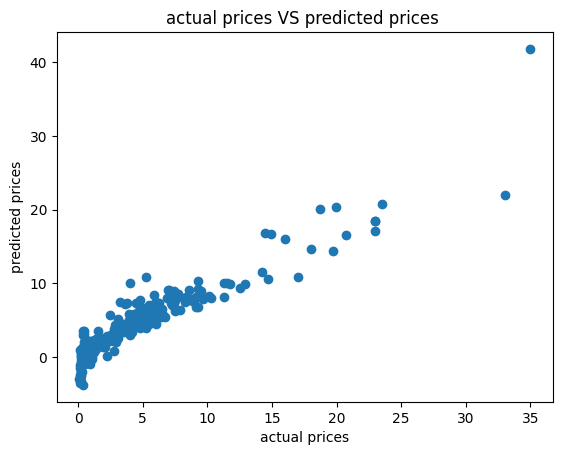

In [20]:
plt.scatter(y_tarin,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices VS predicted prices ")
plt.show()

In [21]:
test_data_prediction = lin_reg_mo.predict(x_test)

In [22]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("r square error:",error_score)

r square error: 0.8365766715026374


In [23]:
print(error_score * 100)

83.65766715026373


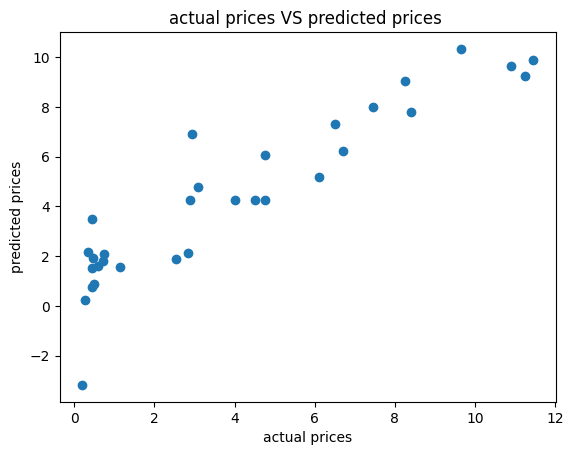

In [24]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices VS predicted prices ")
plt.show()

#### 2. Lasso Regression 

In [25]:
Lasso_reg_mo = Lasso()

In [26]:
Lasso_reg_mo.fit(x_train , y_tarin)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [27]:
training_data_prediction = Lasso_reg_mo.predict(x_train)

In [28]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("r square error:",error_score)

r square error: 0.8365766715026374


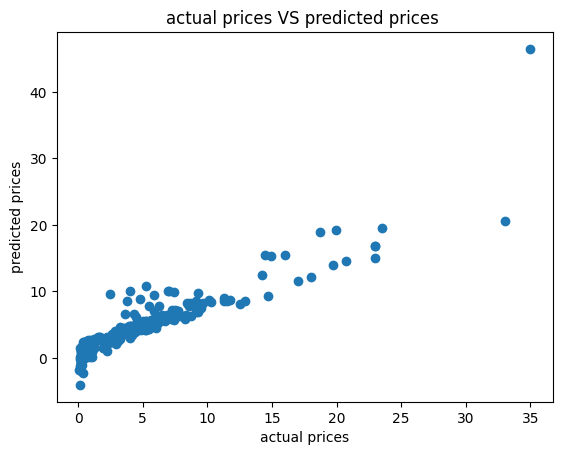

In [29]:
plt.scatter(y_tarin,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices VS predicted prices ")
plt.show()